In [1]:
import pandas as pd
import seaborn as sns
import os
from os import listdir
import os.path as op

In [95]:
file_natural = pd.read_csv('results/natural/natural_imagebind_afforded.csv')
file_natural = file_natural.drop(columns=['Unnamed: 0'])
file_synthetic = pd.read_csv('results/synthetic/synthetic_imagebind_afforded.csv')
file_synthetic = file_synthetic.drop(columns=['Unnamed: 0'])

In [106]:
indexed = file_natural.set_index('group_id')

indexed_ex = indexed[indexed['prompt_type']== 'explicit'].reset_index()
pivoted_ex = indexed_ex.pivot_table(index='group_id', columns='relationships', values='probability', aggfunc='mean').reset_index()
diff_ex = pivoted_ex.assign(diff = abs(pivoted_ex['afforded'] - pivoted_ex['non_afforded']))

indexed_im = indexed[indexed['prompt_type']== 'implicit'].reset_index()
pivoted_im = indexed_im.pivot_table(index='group_id', columns='relationships', values='probability', aggfunc='mean').reset_index()
diff_im = pivoted_im.assign(diff = abs(pivoted_im['afforded'] - pivoted_im['non_afforded']))

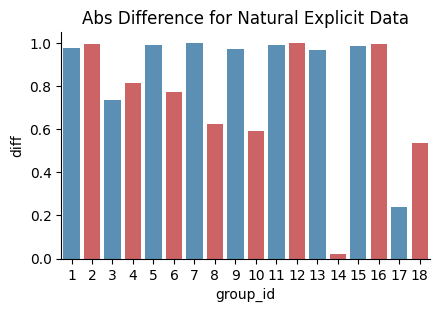

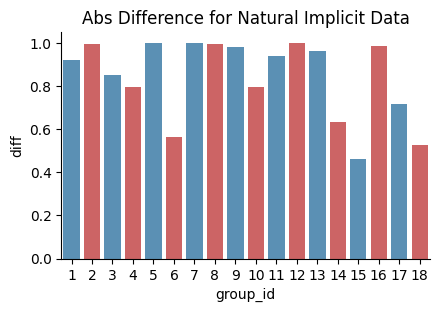

In [119]:
sns.catplot(data = diff_ex,
            x = "group_id",
            y = "diff",
            kind='bar',
            height= 3,
            aspect=1.5,
            palette= ['C0','C3'],
            alpha= 0.8).set(title = 'Abs Difference for Natural Explicit Data')

sns.catplot(data = diff_im,
            x = "group_id",
            y = "diff",
            kind='bar',
            height= 3,
            aspect=1.5,
            palette= ['C0','C3'],
            alpha= 0.8).set(title = 'Abs Difference for Natural Implicit Data')


In [120]:
indexed = file_synthetic.set_index('group_id')

indexed_ex = indexed[indexed['prompt_type']== 'explicit'].reset_index()
pivoted_ex = indexed_ex.pivot_table(index='group_id', columns='relationships', values='probability', aggfunc='mean').reset_index()
diff_ex = pivoted_ex.assign(diff = abs(pivoted_ex['afforded'] - pivoted_ex['non_afforded']))

indexed_im = indexed[indexed['prompt_type']== 'implicit'].reset_index()
pivoted_im = indexed_im.pivot_table(index='group_id', columns='relationships', values='probability', aggfunc='mean').reset_index()
diff_im = pivoted_im.assign(diff = abs(pivoted_im['afforded'] - pivoted_im['non_afforded']))

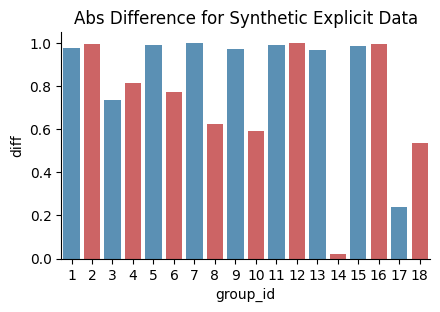

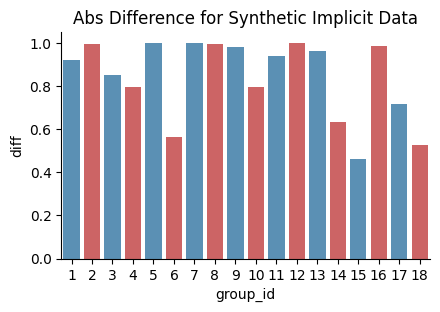

In [121]:
sns.catplot(data = diff_ex,
            x = "group_id",
            y = "diff",
            kind='bar',
            height= 3,
            aspect=1.5,
            palette= ['C0','C3'],
            alpha= 0.8).set(title = 'Abs Difference for Synthetic Explicit Data')


sns.catplot(data = diff_im,
            x = "group_id",
            y = "diff",
            kind='bar',
            height= 3,
            aspect=1.5,
            palette= ['C0','C3'],
            alpha= 0.8).set(title = 'Abs Difference for Synthetic Implicit Data')
